<a href="https://colab.research.google.com/github/RJ4RJ/DBMS/blob/main/Tourists_Arrivals_prediction_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/2010-2025 without total.xlsx'
df = pd.read_excel(file_path)
print(df.columns)
df.head()

Index(['Month', '2025', '2024', '2023', '2022', '2021', '2020', '2019', '2018',
       '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010'],
      dtype='object')


,Month,2025,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,January,252761.0,208253,102545,82327,1682,228434,244239,238924,219360,194280,156246,146575,110543,85874,74197,50757
1,February,240217.0,218350,107639,96507,3366,207507,252033,235618,197517,197697,165541,141878,113968,83549,65797,57300
2,March,229298.0,209181,125495,106500,4581,71370,244328,233382,188076,192841,157051,133048,113208,91102,75130,52352
3,April,174608.0,148867,105498,62980,4168,0,166975,180429,160249,136367,122217,112631,80737,69591,63835,38300
4,May,NaN,112128,83309,30207,1497,0,37802,129466,121891,125044,113529,90046,74838,57506,48943,35213


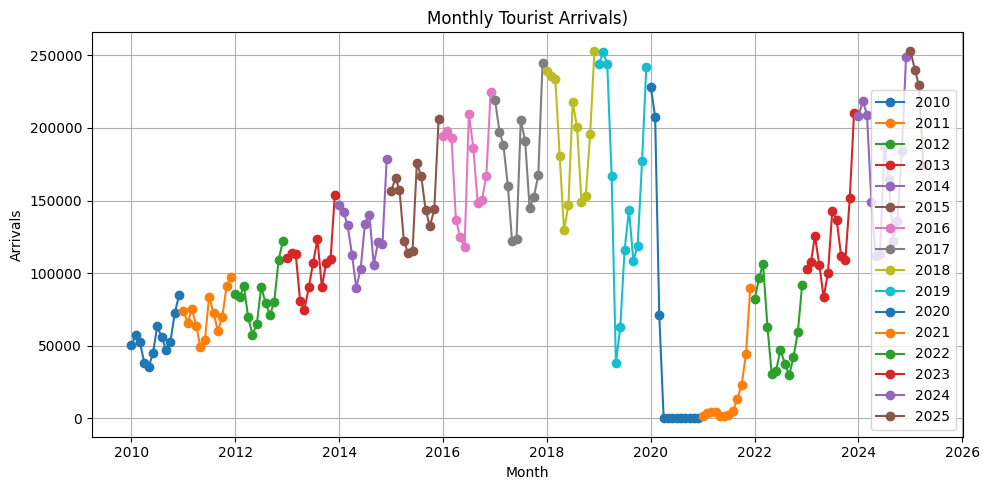

In [ ]:
# Step 1: Install required packages
!pip install pandas matplotlib openpyxl --quiet

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load the Excel file
file_path = '/content/2010-2025 without total.xlsx'
df = pd.read_excel(file_path)

# Step 4: Clean and reshape the data
df.columns = [col.strip() for col in df.columns]  # Clean column names

# Convert to long format (Month, Year, Arrivals)
df_long = df.melt(id_vars='Month', var_name='Year', value_name='Arrivals')

# Create a datetime column for sorting and plotting
df_long['Date'] = pd.to_datetime(df_long['Month'] + ' ' + df_long['Year'])

# Sort by date
df_long = df_long.sort_values('Date')

# Step 5: Plot
plt.figure(figsize=(10, 5))
for year in ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024', '2025']:
    subset = df_long[df_long['Year'] == year]
    plt.plot(subset['Date'], subset['Arrivals'], marker='o', label=year)

plt.title('Monthly Tourist Arrivals)')
plt.xlabel('Month')
plt.ylabel('Arrivals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

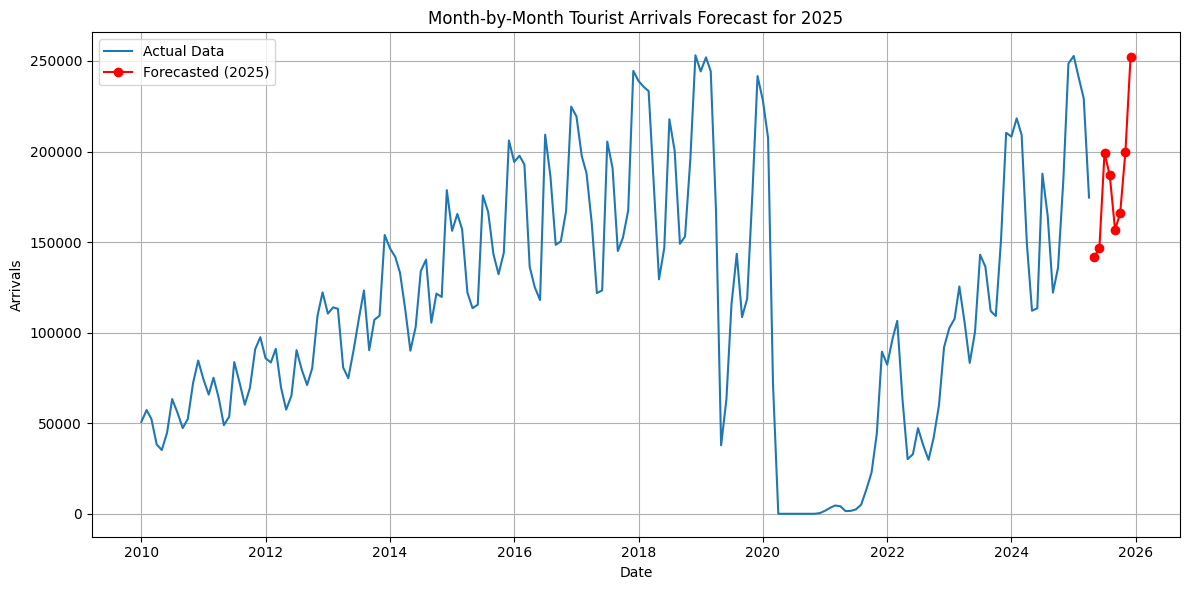

Arrivals,Forecasted Arrivals
Date,
2025-05-01,141608.325068
2025-06-01,146826.817197
2025-07-01,199208.166104
2025-08-01,186823.222482
2025-09-01,156797.704075
2025-10-01,165967.368071
2025-11-01,200024.032205
2025-12-01,252018.053577


In [ ]:
# Step 1: Install required packages
!pip install pandas matplotlib statsmodels openpyxl --quiet

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Step 3: Load data
file_path = '/content/2010-2025 without total.xlsx'
df = pd.read_excel(file_path)
df.columns = [col.strip() for col in df.columns]  # Clean column names

# Step 4: Reshape and prepare time series
df_long = df.melt(id_vars='Month', var_name='Year', value_name='Arrivals')
df_long['Date'] = pd.to_datetime(df_long['Month'] + ' ' + df_long['Year'])
df_long = df_long.sort_values('Date').set_index('Date')

# Step 5: Create the time series (monthly frequency)
ts = df_long['Arrivals'].asfreq('MS')

# Step 6: Fit SARIMA model (p,d,q)x(P,D,Q,s)
# s=12 for monthly seasonality
model = SARIMAX(ts.dropna(), order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Step 7: Forecast remaining months in 2025
last_date = ts.dropna().index[-1]
months_left = 12 - last_date.month
forecast_steps = months_left if months_left > 0 else 0
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()
forecast_df.index.name = 'Date'
forecast_df.rename(columns={'mean': 'Forecasted Arrivals'}, inplace=True)

# Step 8: Combine actual and forecast
combined = pd.concat([ts, forecast_df['Forecasted Arrivals']], axis=0)

# Step 9: Plot the result
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual Data')
plt.plot(forecast_df['Forecasted Arrivals'], label='Forecasted (2025)', color='red', marker='o')
plt.title('Month-by-Month Tourist Arrivals Forecast for 2025')
plt.xlabel('Date')
plt.ylabel('Arrivals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Show the forecasted values
forecast_df[['Forecasted Arrivals']]


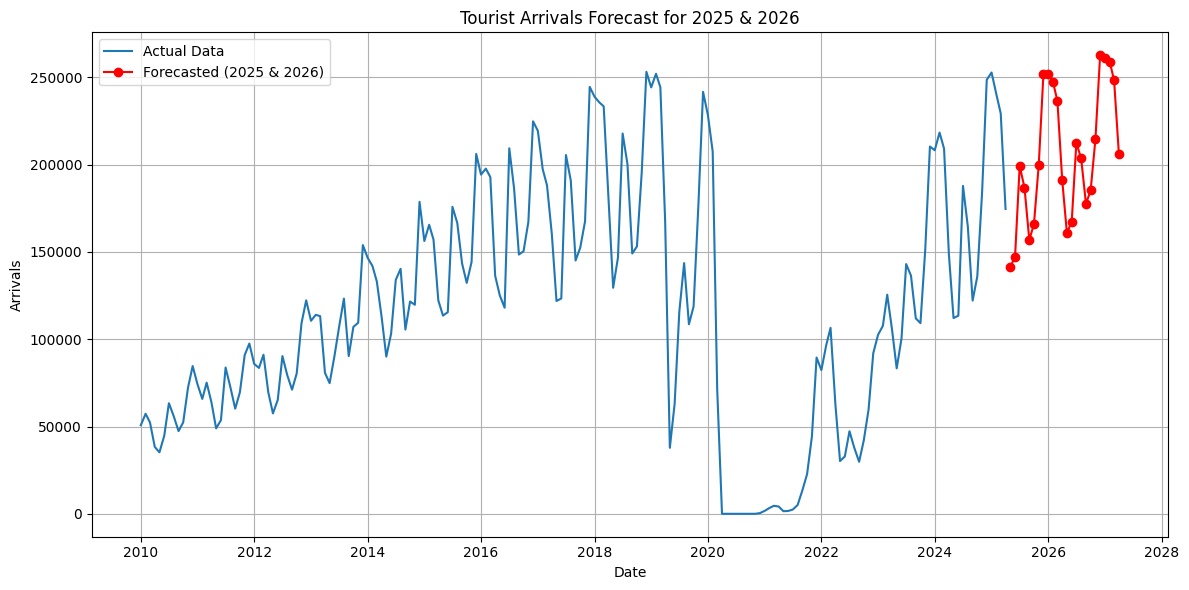

Arrivals,Forecasted Arrivals
Date,
2025-05-01,141608.325068
2025-06-01,146826.817197
2025-07-01,199208.166104
2025-08-01,186823.222482
2025-09-01,156797.704075
2025-10-01,165967.368071
2025-11-01,200024.032205
2025-12-01,252018.053577
2026-01-01,252039.797431


In [ ]:
# Step 1: Install required packages
!pip install pandas matplotlib statsmodels openpyxl --quiet

# Step 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Step 3: Load data
file_path = '/content/2010-2025 without total.xlsx'
df = pd.read_excel(file_path)
df.columns = [col.strip() for col in df.columns]  # Clean column names

# Step 4: Reshape to long format and set date
df_long = df.melt(id_vars='Month', var_name='Year', value_name='Arrivals')
df_long['Date'] = pd.to_datetime(df_long['Month'] + ' ' + df_long['Year'])
df_long = df_long.sort_values('Date').set_index('Date')

# Step 5: Create time series with monthly frequency
ts = df_long['Arrivals'].asfreq('MS')

# Step 6: Fit SARIMA model
model = SARIMAX(ts.dropna(), order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Step 7: Forecast next 24 months (2025 + 2026)
forecast_steps = 24
forecast = results.get_forecast(steps=forecast_steps)
forecast_df = forecast.summary_frame()
forecast_df.index.name = 'Date'
forecast_df.rename(columns={'mean': 'Forecasted Arrivals'}, inplace=True)

# Step 8: Combine actual + forecast
combined = pd.concat([ts, forecast_df['Forecasted Arrivals']], axis=0)

# Step 9: Plot all
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual Data')
plt.plot(forecast_df['Forecasted Arrivals'], label='Forecasted (2025 & 2026)', color='red', marker='o')
plt.title('Tourist Arrivals Forecast for 2025 & 2026')
plt.xlabel('Date')
plt.ylabel('Arrivals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 10: Show forecast table
forecast_df[['Forecasted Arrivals']]


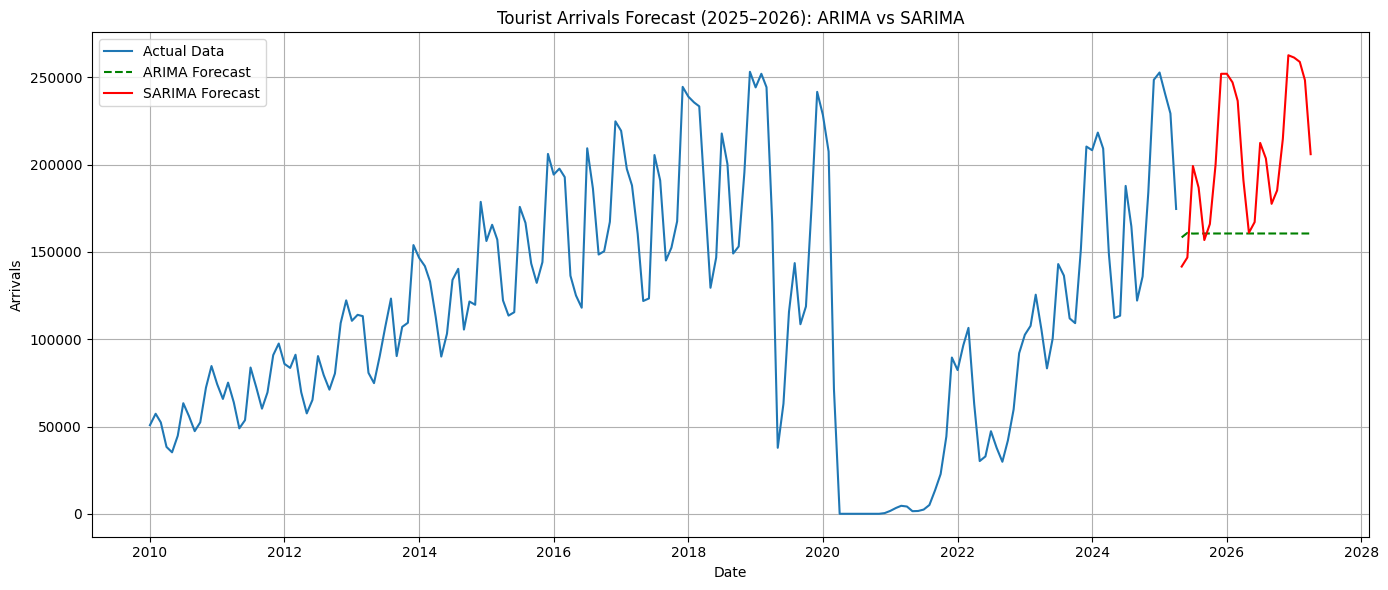


===== ARIMA Model Summary =====
                               SARIMAX Results                                
Dep. Variable:               Arrivals   No. Observations:                  184
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2147.402
Date:                Sun, 11 May 2025   AIC                           4300.804
Time:                        16:37:44   BIC                           4310.432
Sample:                    01-01-2010   HQIC                          4304.707
                         - 04-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1593      0.209     -0.764      0.445      -0.568       0.249
ma.L1          0.4832      0.201      2.404      0.016       0.089       0.877
sigma2      9.723e+

In [1]:
# Step 1: Install necessary packages
!pip install pandas matplotlib statsmodels openpyxl --quiet

# Step 2: Imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Step 3: Load and prepare data
file_path = '/content/2010-2025 without total.xlsx'
df = pd.read_excel(file_path)
df.columns = [col.strip() for col in df.columns]

# Step 4: Convert wide to long format and create datetime index
df_long = df.melt(id_vars='Month', var_name='Year', value_name='Arrivals')
df_long['Date'] = pd.to_datetime(df_long['Month'] + ' ' + df_long['Year'])
df_long = df_long.sort_values('Date').set_index('Date')

# Step 5: Monthly frequency time series
ts = df_long['Arrivals'].asfreq('MS')

# Step 6: ARIMA Model (no seasonality)
arima_model = ARIMA(ts.dropna(), order=(1,1,1))
arima_results = arima_model.fit()

# Step 7: SARIMA Model (with seasonality)
sarima_model = SARIMAX(ts.dropna(), order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()

# Step 8: Forecast for 24 months (2025 + 2026)
forecast_steps = 24
arima_forecast = arima_results.get_forecast(steps=forecast_steps).summary_frame()
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps).summary_frame()

arima_forecast.rename(columns={'mean': 'ARIMA Forecast'}, inplace=True)
sarima_forecast.rename(columns={'mean': 'SARIMA Forecast'}, inplace=True)

# Step 9: Combine results for comparison
comparison = pd.concat([arima_forecast['ARIMA Forecast'], sarima_forecast['SARIMA Forecast']], axis=1)

# Step 10: Plotting
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Actual Data')
plt.plot(comparison['ARIMA Forecast'], label='ARIMA Forecast', linestyle='--', color='green')
plt.plot(comparison['SARIMA Forecast'], label='SARIMA Forecast', linestyle='-', color='red')
plt.title('Tourist Arrivals Forecast (2025–2026): ARIMA vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Arrivals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Print summaries
print("\n===== ARIMA Model Summary =====")
print(arima_results.summary())

print("\n===== SARIMA Model Summary =====")
print(sarima_results.summary())

# Optional: Export forecasts to Excel
comparison.to_excel('forecast_comparison_arima_sarima.xlsx')
